### The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables.

* Car Name – Name of the car
* Cyl – No of cylinders in the car – Multivalued discrete
* Disp – Displacement – continuous
* Hp – Horsepower – continuous
* Wt – Weight – continuous
* Acc – Accleration – continuous
* Yr – Model of the car – Multivalued discrete

In [0]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

## Steps to be followed:
### 1. Load The Dataset

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ds = pd.read_csv('/content/drive/My Drive/cars-dataset.csv')

In [47]:
ds.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [48]:
ds.shape

(398, 8)

In [49]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 24.9+ KB


* hp should have been dispplayed as numeric, its showing as object we need to trat these

In [50]:
ds.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

* Because of question mark the type has been taken as object

In [51]:
(ds['hp'] == '?').sum()

6

In [0]:
ds.replace(['?'], ds['hp'].mode(),inplace = True)

In [53]:
(ds['hp'] == '?').sum()

0

In [0]:
ds['hp'] = ds['hp'].astype(int)

In [55]:
ds.dtypes

car name     object
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [56]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,NaN,NaN,NaN,105.156,38.601,46,76,95,130,230
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6


### 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['car name'] = le.fit_transform(ds['car name'])

In [58]:
ds.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
car name,398.0,148.550251,89.495880,0.0,65.250,150.0,225.750,304.0
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,105.155779,38.600986,46.0,76.000,95.0,130.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


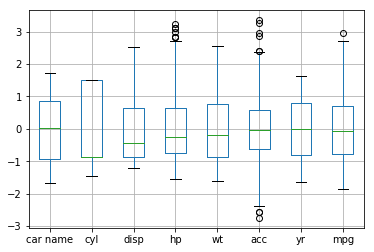

In [59]:
#Check for outliers and see if it valid or requires treatment
from scipy.stats import zscore
ds.apply(zscore).boxplot()
plt.show()

In [0]:
def remove_outlier(dFrame, col_name):
    q1 = dFrame[col_name].quantile(0.25)
    q3 = dFrame[col_name].quantile(0.75)
    IQR = q3-q1 #Interquartile range
    lowVal  = q1 - 1.5*IQR
    highVal = q3 + 1.5*IQR
    frame_ret = dFrame.loc[(dFrame[col_name] > lowVal) & (dFrame[col_name] < highVal)]
    return frame_ret

In [0]:
for col in ds.columns:
    if(col != 'car name'):
        ds = remove_outlier(ds, col)

In [62]:
ds.shape

(381, 8)

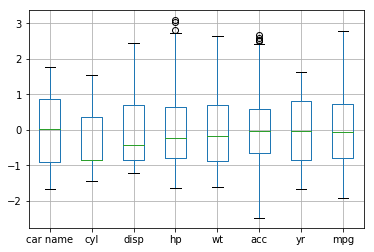

In [63]:
#Check for outliers and see if it valid or requires treatment
from scipy.stats import zscore
ds.apply(zscore).boxplot()
plt.show()

### 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

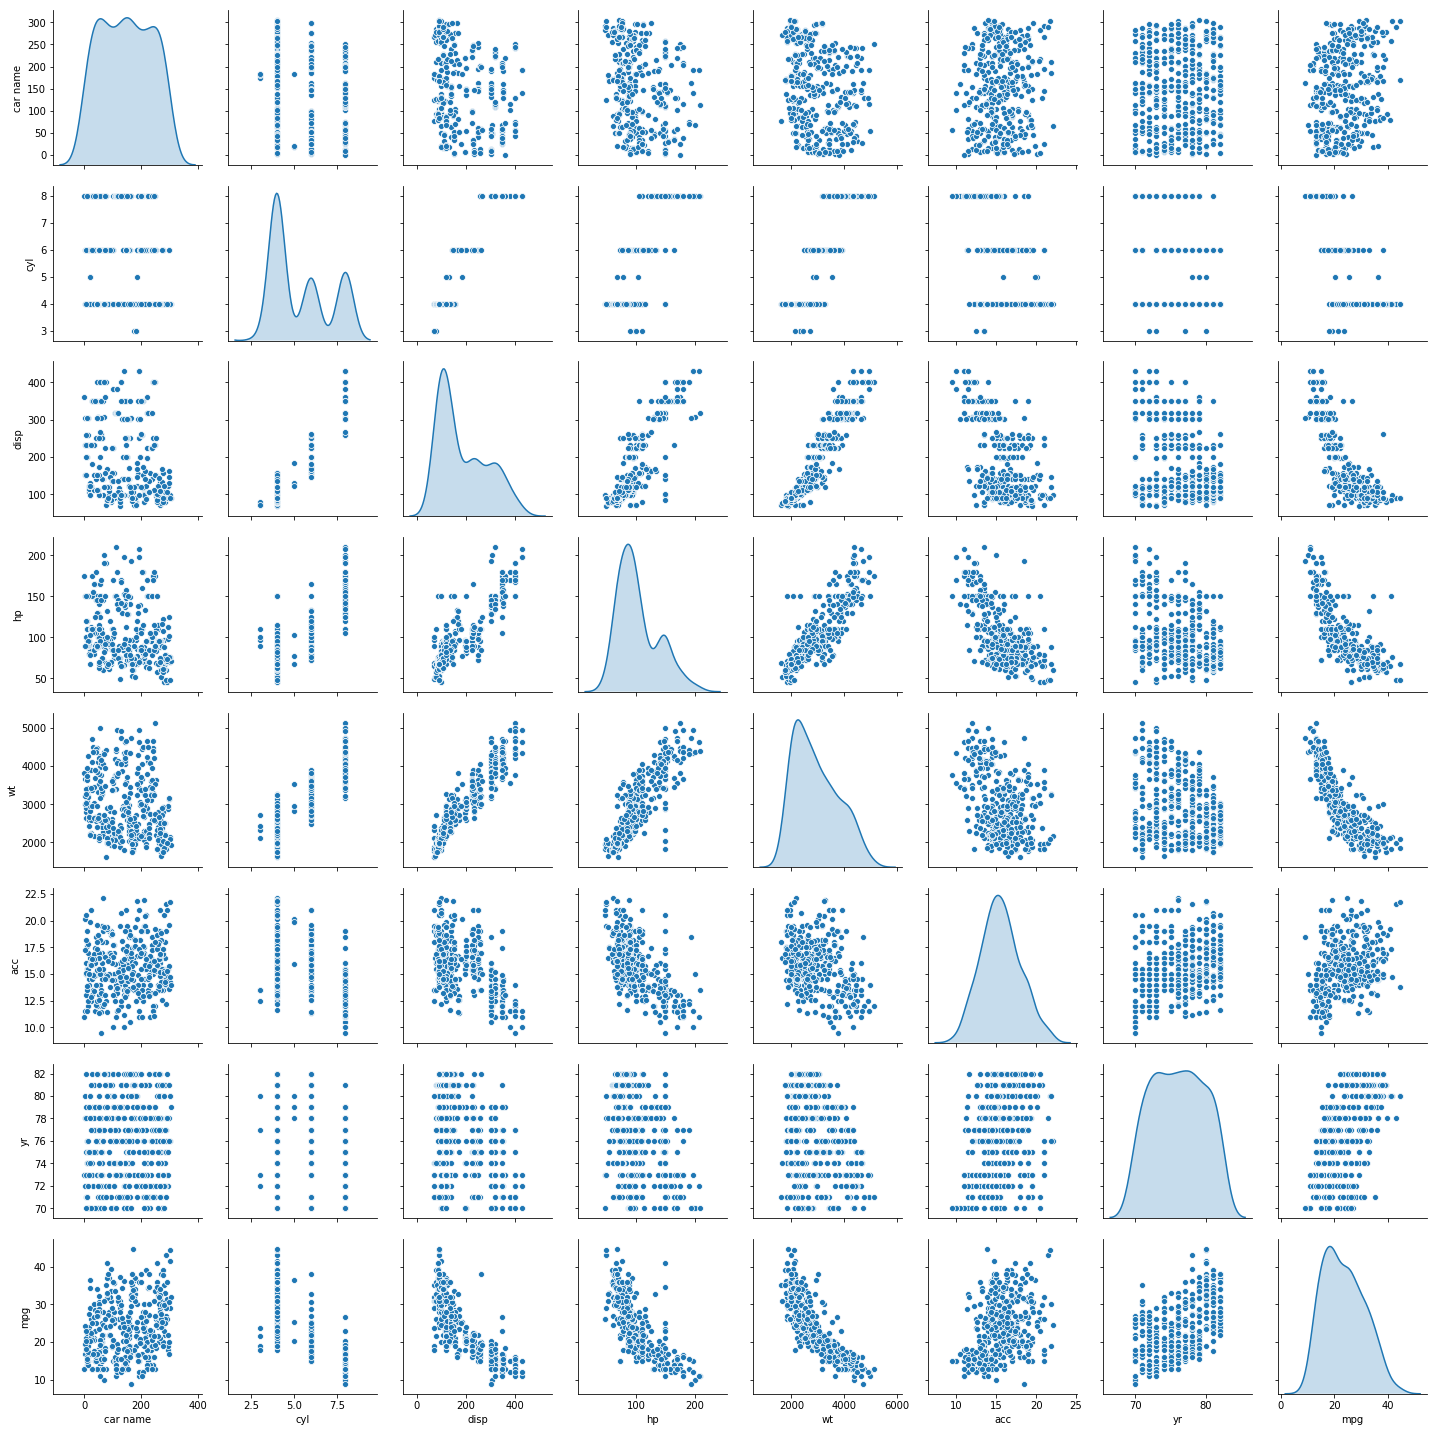

In [64]:
sns.pairplot(ds, diag_kind='kde')
plt.show()

Clusters thought of based on the diagonal KDE plot
1. Car Name : 3 clusters
2. cylinders :  3 clusters can be clearely identified
3. displacement : 2 to 3 clusters
4. hp : two clusters
5. wt : possibly 2 clusters
6. acc : no cluster seen from plot
6. year : no cluster seen from plot
7. mpg : there might be 2 or more overlapping clusters

Relationship seen between target variable [mpg] and other independent variables
* HP, Displacement and Weight are strongly correlating with MPG. As HP or displacement or weight increases, MPG decreases.
* No strong correlation seen between acc and MPG.

### 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [0]:
from scipy.stats import zscore
ds_scaled = ds.drop('mpg', axis=1).apply(zscore)

In [0]:
from sklearn.cluster import KMeans
cluster_error = []
cluster_range = range(2, 10)   
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 10, random_state=5)
  clusters.fit(ds_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_error.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(ds_scaled, labels, metric='euclidean'))

In [67]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error , "Avg Sil Score": cluster_sil_scores } )
clusters_df

,Avg Sil Score,cluster_errors,num_clusters
0,0.433391,1434.631268,2
1,0.292417,1149.345959,3
2,0.266881,979.359757,4
3,0.256389,878.971331,5
4,0.260526,806.236389,6
5,0.259941,748.119599,7
6,0.233242,692.198206,8
7,0.227017,648.928523,9


<function matplotlib.pyplot.show>

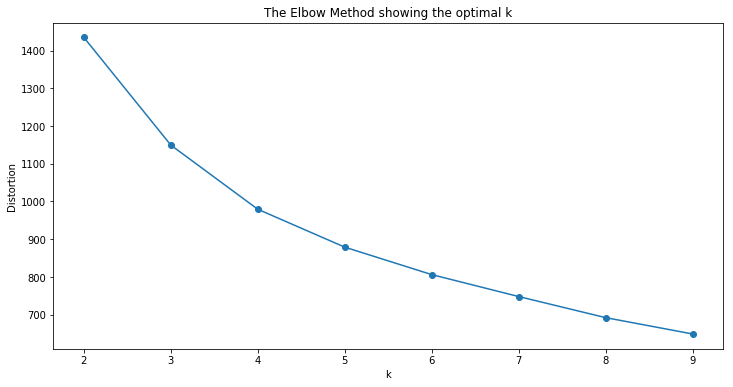

In [68]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show

* from above elbow appearing 3 ~ 4 clusters are present

In [0]:
kmeans = KMeans(n_clusters=3, n_init =10, random_state=5)

In [70]:
kmeans.fit(ds_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [71]:
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns = ds_scaled.columns )
centroid_df

,car name,cyl,disp,hp,wt,acc,yr
0,-0.341323,1.539750,1.528116,1.526654,1.432108,-1.075203,-0.593660
1,-0.379758,0.389094,0.318328,-0.031304,0.331432,0.366612,0.013691
2,0.319964,-0.840371,-0.803130,-0.643262,-0.767749,0.296111,0.249450


In [72]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,

In [0]:
ds['label'] = kmeans.labels_

In [74]:
ds.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,label
0,49,8,307.0,130,3504,12.0,70,18.0,0
1,36,8,350.0,165,3693,11.5,70,15.0,0
2,231,8,318.0,150,3436,11.0,70,18.0,0
3,14,8,304.0,150,3433,12.0,70,16.0,0
4,161,8,302.0,140,3449,10.5,70,17.0,0


In [75]:
ds.label.value_counts()

2    202
1     92
0     87
Name: label, dtype: int64

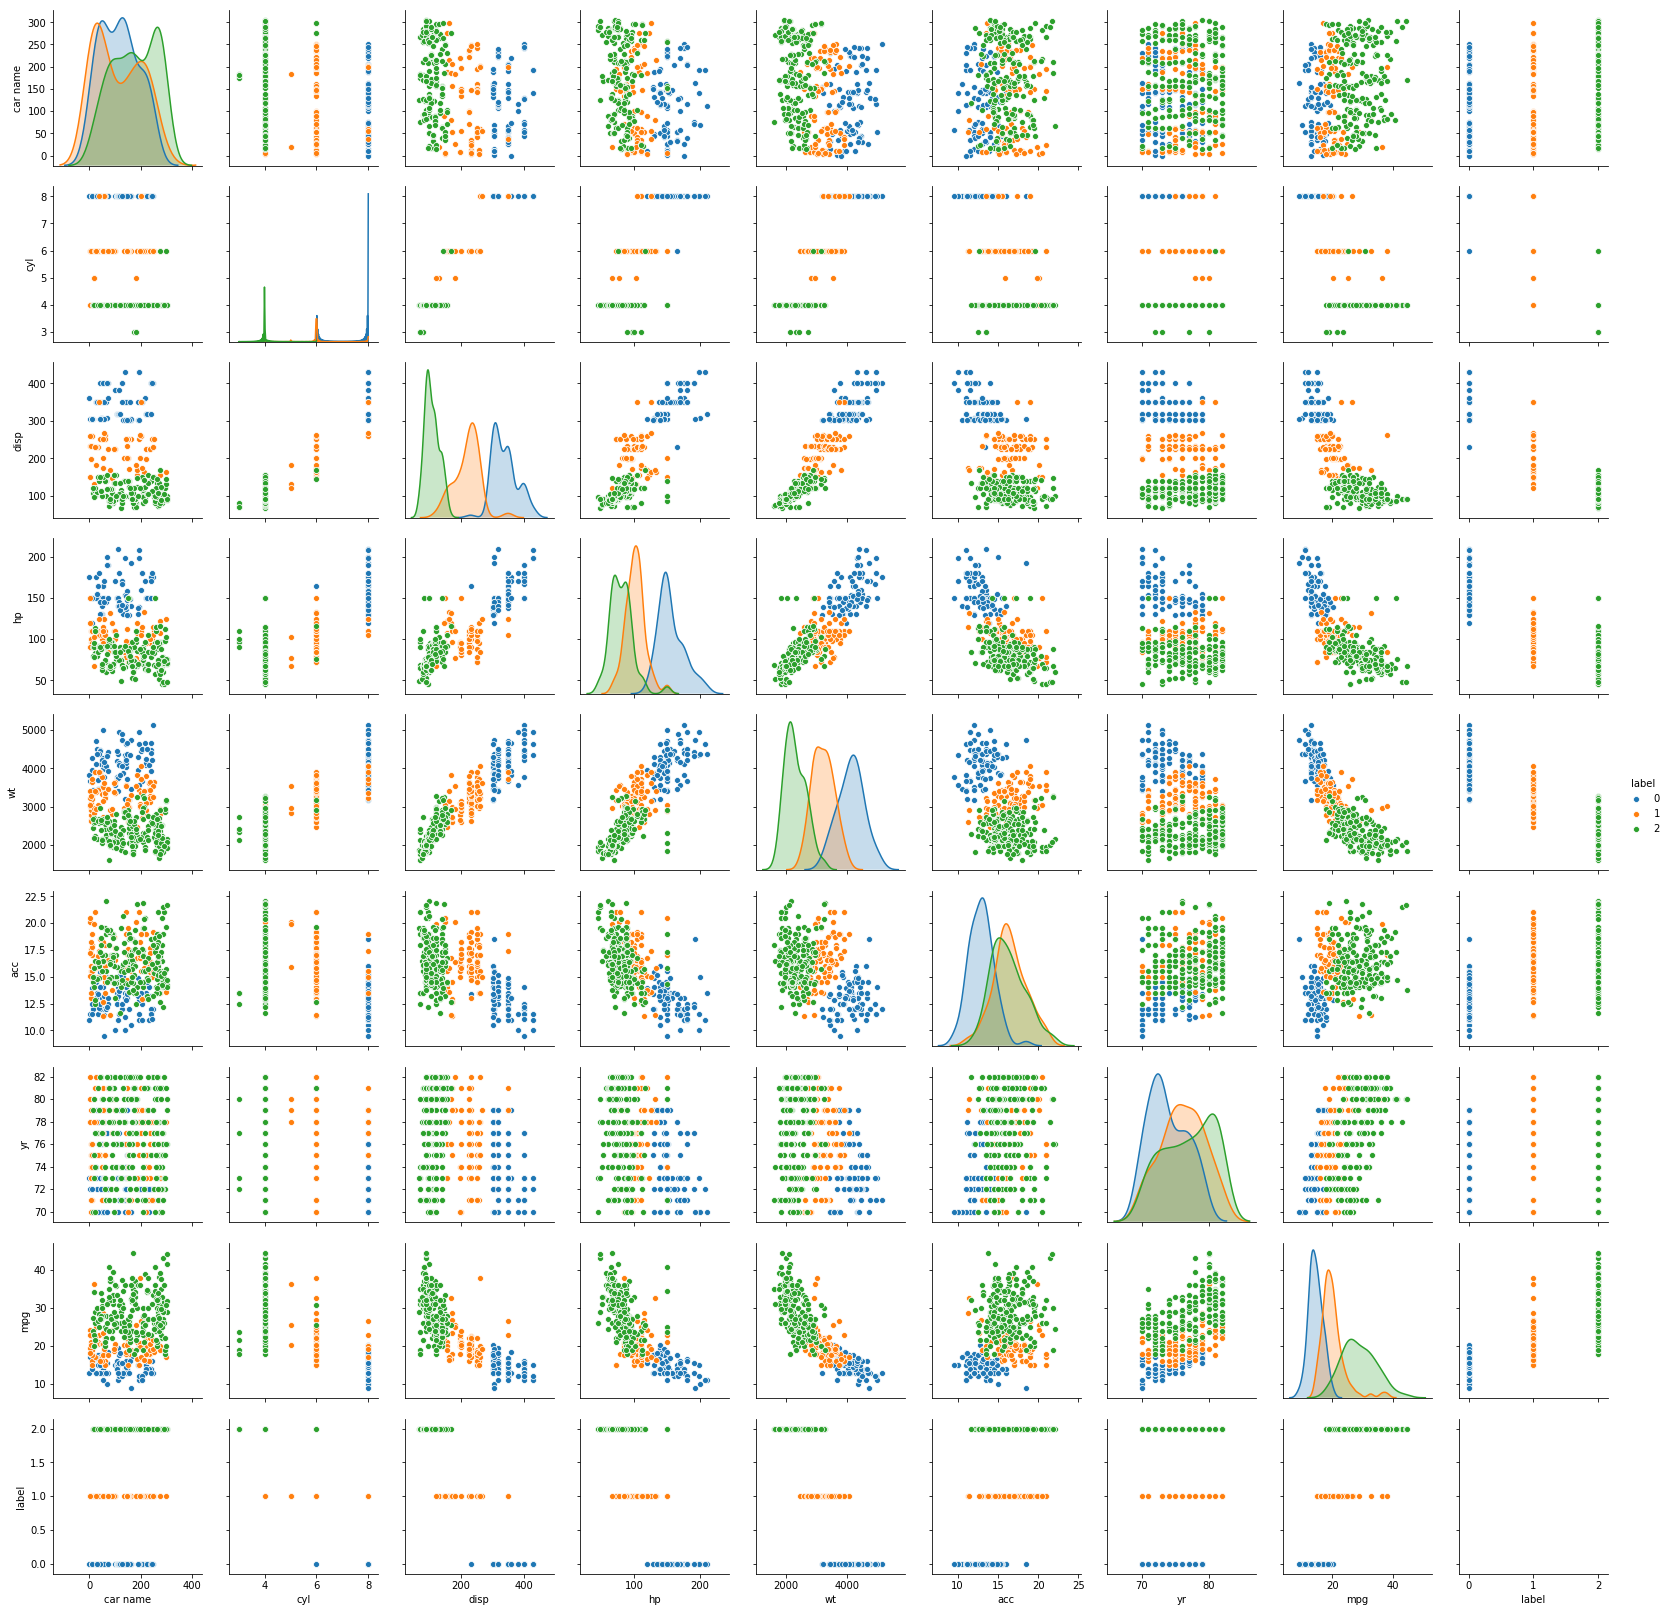

In [76]:
sns.pairplot(ds, diag_kind='kde', hue='label')
plt.show()

* Let's Plot Dendogram to see how Hierarchical clusterring appears

In [0]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [78]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(ds, method='ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(ds))
print(c)
print(Z)

0.7519338718663339
[[1.20000000e+01 2.20000000e+01 1.00000000e+00 2.00000000e+00]
 [1.70000000e+02 1.86000000e+02 4.12431813e+00 2.00000000e+00]
 [3.67000000e+02 3.68000000e+02 6.12290781e+00 2.00000000e+00]
 ...
 [7.54000000e+02 7.55000000e+02 6.91542110e+03 2.34000000e+02]
 [7.56000000e+02 7.57000000e+02 7.35291612e+03 1.47000000e+02]
 [7.58000000e+02 7.59000000e+02 1.98880025e+04 3.81000000e+02]]


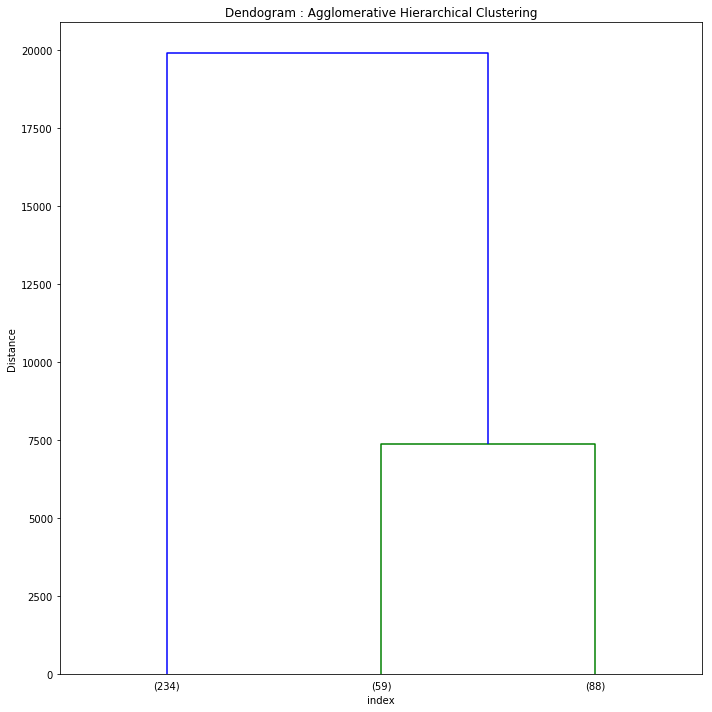

In [79]:
plt.figure(figsize=(10, 10))
plt.title('Dendogram : Agglomerative Hierarchical Clustering')
plt.xlabel('index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0., truncate_mode="lastp", p=3, leaf_font_size=10.)
plt.tight_layout()

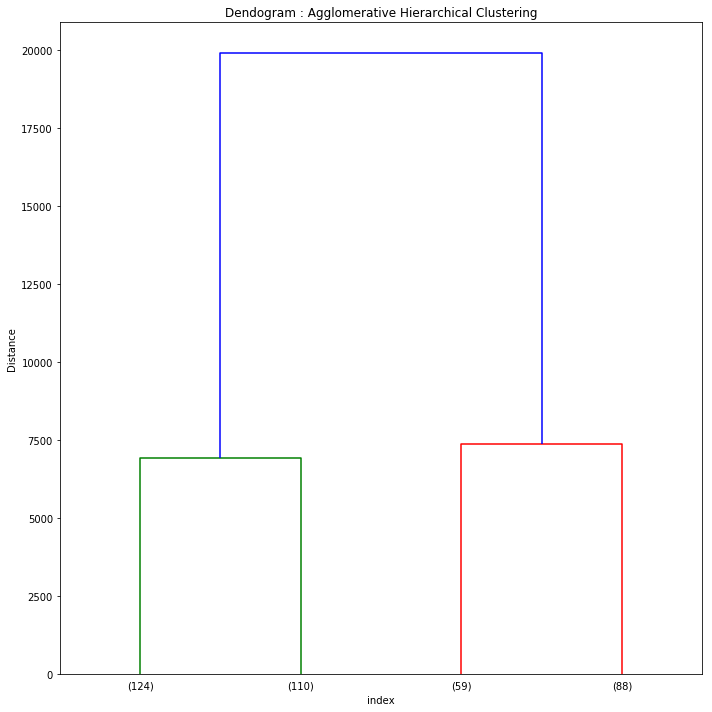

In [80]:
plt.figure(figsize=(10, 10))
plt.title('Dendogram : Agglomerative Hierarchical Clustering')
plt.xlabel('index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0., truncate_mode="lastp", p=4, leaf_font_size=10.)
plt.tight_layout()

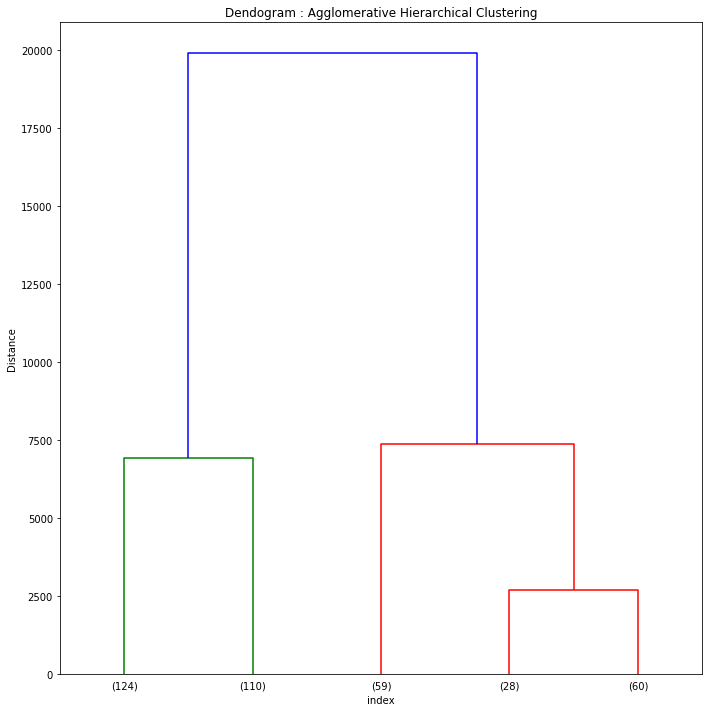

In [81]:
plt.figure(figsize=(10, 10))
plt.title('Dendogram : Agglomerative Hierarchical Clustering')
plt.xlabel('index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0., truncate_mode="lastp", p=5, leaf_font_size=10.)
plt.tight_layout()

### 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [0]:
ds1 = ds[ds.loc[:,'label'] == 0]

In [0]:
from sklearn.linear_model import LinearRegression

In [84]:
ds1_y = ds1.pop('mpg')
ds1.pop('label')
ds1.pop('car name')

0       49
1       36
2      231
3       14
4      161
5      141
10     101
12      57
26      68
27     112
28     163
38      54
39     242
40     141
41     223
42     116
43     129
44     250
62      54
63     241
64     223
65     141
66       2
67     192
68      31
69     203
70      75
72      11
73      48
74     143
      ... 
166    154
187     50
188    108
189     10
190    142
208    239
212     39
213     67
214    132
215    111
221     44
223    117
224    189
229    245
230     58
231     70
232    160
250    114
251    195
262     58
263     33
264    140
265    115
285     44
286    149
287    190
288    120
289     30
290    129
292     73
Name: car name, Length: 87, dtype: int64

In [0]:
ds1_y = ds1_y.values.reshape(len(ds1_y),1)

In [90]:
ds1.shape

(87, 6)

In [0]:
ds1_x = ds1

In [92]:
ds1_x.shape

(87, 6)

In [0]:
ds1_xtrain, ds1_xtest, ds1_ytrain, ds1_ytest = train_test_split(ds1_x,ds1_y,test_size = 0.3)

In [94]:
ds1_ytest.shape

(27, 1)

In [0]:
Lreg = LinearRegression()

In [96]:
Lreg.fit(ds1_xtrain,ds1_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
ds1_ypred = Lreg.predict(ds1_xtest)

In [98]:
ds1_ytest.shape

(27, 1)

In [99]:
Lreg.score(ds1_xtest, ds1_ytest)

0.5024902754227182

In [100]:
ds1_ytest.shape

(27, 1)

In [101]:
Lreg.score(ds1_xtrain, ds1_ytrain)

0.5919243765742064

In [0]:
ds2 = ds[ds.loc[:,'label'] == 1]

In [103]:
ds2_y = ds2.pop('mpg')
ds2.pop('label')
ds2.pop('car name')

15     220
16       8
17     150
24       7
33       7
34     232
35      49
36     162
37      10
45       9
47     243
48     151
97     235
98      62
99       8
100    150
101    220
107      7
113    188
123    276
125    220
126    150
127      8
128     61
133     50
134     10
135    234
152    236
153     61
154    194
      ... 
258     28
259    196
260     98
261      4
274     19
275    298
277    214
280    247
281    197
283      6
284     99
291     56
297    184
298     38
306     52
307    205
315      3
316     98
327     20
333     81
341     52
362     90
363     24
364    200
365    146
366     72
374      5
386     26
387    199
389    147
Name: car name, Length: 92, dtype: int64

In [0]:
ds2_y = ds2_y.values.reshape(len(ds2_y),1)

In [0]:
ds2_x = ds2

In [0]:
ds2_xtrain, ds2_xtest, ds2_ytrain, ds2_ytest = train_test_split(ds2_x,ds2_y,test_size = 0.3)

In [0]:
Lreg2 = LinearRegression()

In [108]:
Lreg2.fit(ds2_xtrain,ds2_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
Lreg2.score(ds2_xtest, ds2_ytest)

0.23618358277367402

In [110]:
Lreg2.score(ds2_xtrain, ds2_ytrain)

0.48044638269012835

In [0]:
a1 = Lreg2.coef_

In [0]:
x2 = pd.DataFrame(a1, columns=ds2.columns)

In [113]:
x2

,cyl,disp,hp,wt,acc,yr
0,-0.030527,0.018122,-0.015942,-0.005885,-0.058561,0.550083


In [0]:
ds3 = ds[ds.loc[:,'label'] == 2]

In [115]:
ds3_y = ds3.pop('mpg')
ds3.pop('label')
ds3.pop('car name')

14     274
18      95
19     282
20     211
21      16
22     258
23      22
29      95
30      65
31     271
32     156
46      64
49     187
50     208
51     210
52     123
53     267
54      76
55     286
56     218
57     272
58     105
60      63
61     158
71     183
76     295
77     283
78     212
79     253
80     157
      ... 
358    175
359    213
360    299
361    275
367     45
368     47
369     46
370    246
371     96
372    248
373    138
375    290
376    179
377    178
378    227
379    191
380    198
381    164
382    266
383    167
384    168
385     83
388     71
390    264
391    102
392     43
393    153
395    119
396    159
397     69
Name: car name, Length: 202, dtype: int64

In [0]:
ds3_y = ds3_y.values.reshape(len(ds3_y),1)

In [0]:
ds3_x = ds3

In [0]:
ds3_xtrain, ds3_xtest, ds3_ytrain, ds3_ytest = train_test_split(ds3_x,ds3_y,test_size = 0.3)

In [0]:
Lreg3 = LinearRegression()

In [121]:
Lreg3.fit(ds3_xtrain,ds3_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
a3 = Lreg3.coef_

In [0]:
x3 = pd.DataFrame(a3, columns=ds3.columns)

In [124]:
x3

,cyl,disp,hp,wt,acc,yr
0,2.77907,-0.013801,-0.012818,-0.008885,0.361182,0.883969


In [125]:
Lreg3.score(ds3_xtest, ds3_ytest)

0.6525889224147973